# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import re
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [2]:
data=pd.read_csv('../Data/merged_data-final.csv', index_col=0)

In [3]:
data = data.iloc[::-1]
data

,Close(TCB),Close(ABI)
Date,,
05/04/2023,29050,32000
05/05/2023,28700,32000
05/08/2023,29400,32000
05/09/2023,29300,32000
05/10/2023,29300,32000
...,...,...
04/24/2024,47000,23800
04/25/2024,46150,23900
04/26/2024,46600,24400


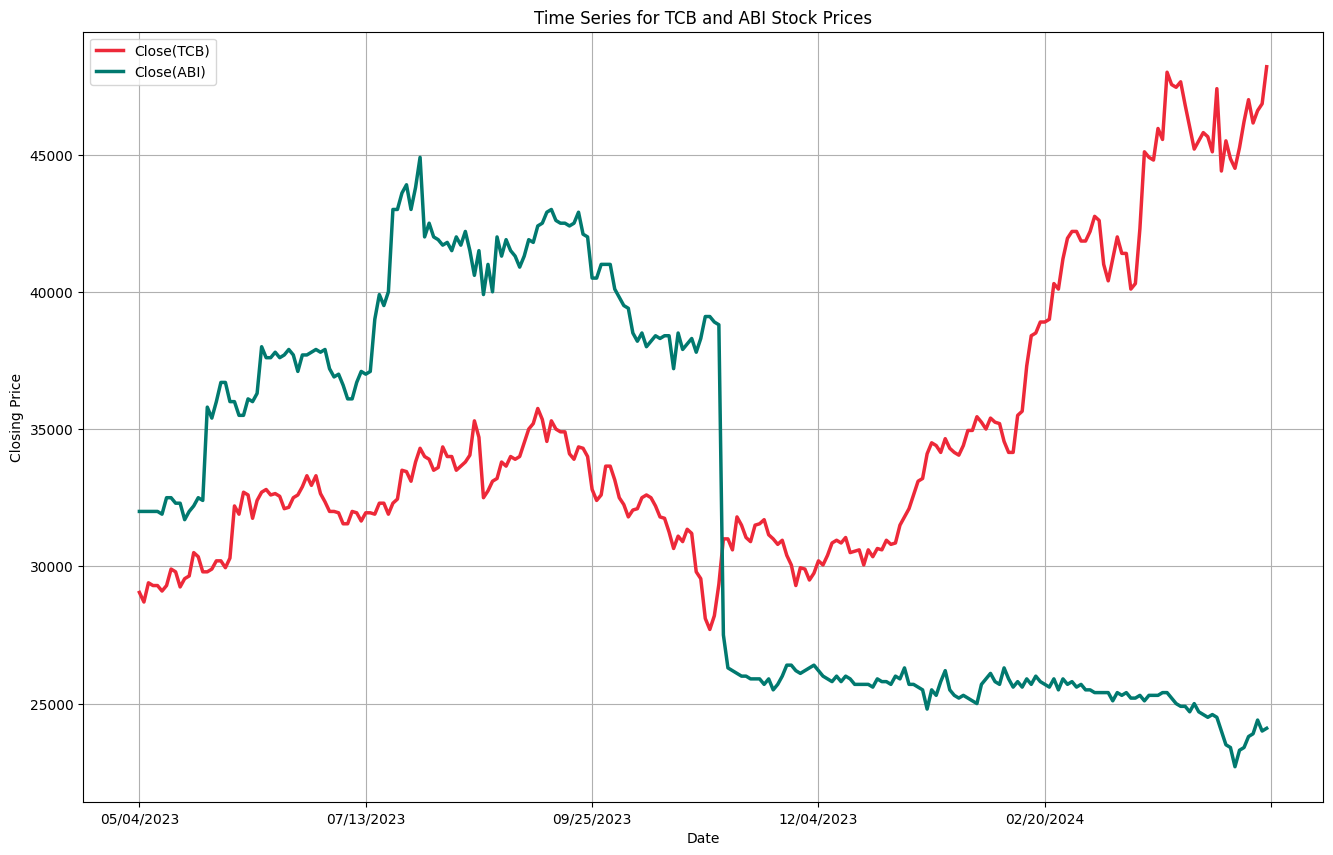

In [4]:
price = data
color=['#ed2939','#01796f']
price.plot(color = color, figsize=(16,10), linewidth=2.5)
plt.title('Time Series for TCB and ABI Stock Prices')
plt.ylabel('Closing Price')
plt.grid()
plt.show()



# Calculate the daily log returns and drop any NAs

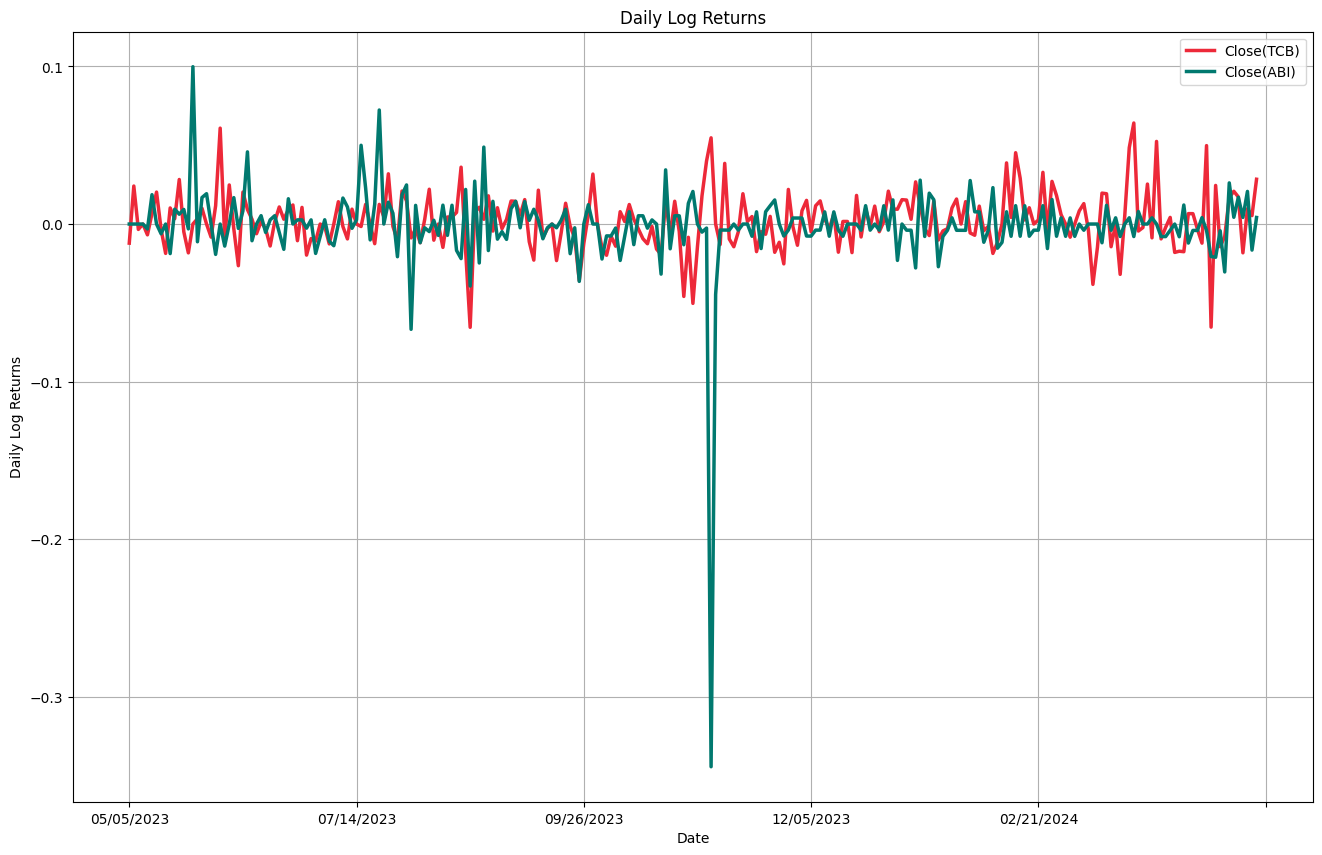

In [5]:
log_returns = np.log(data/data.shift(1)).dropna()

color=['#ed2939','#01796f']
log_returns.plot(color = color, figsize=(16,10), linewidth=2.5)
plt.title('Daily Log Returns')
plt.ylabel('Daily Log Returns')
plt.grid()
plt.show()

In [6]:
log_returns=log_returns.round(5)
log_returns

,Close(TCB),Close(ABI)
Date,,
05/05/2023,-0.01212,0.00000
05/08/2023,0.02410,0.00000
05/09/2023,-0.00341,0.00000
05/10/2023,0.00000,0.00000
05/11/2023,-0.00685,-0.00313
...,...,...
04/24/2024,0.01717,0.01695
04/25/2024,-0.01825,0.00419
04/26/2024,0.00970,0.02070


In [7]:
log_returns.describe()

,Close(TCB),Close(ABI)
count,249.000000,249.000000
mean,0.002034,-0.001138
std,0.017869,0.026963
min,-0.065500,-0.344230
25%,-0.008530,-0.007720
50%,0.000000,0.000000
75%,0.011580,0.007690
max,0.064100,0.099790


# Create an equally weighted portfolio

In [8]:
# quantities = [3000000, 2000000]

In [9]:
# portfolio_value =  data.iloc[-1].iloc[0]*quantities[0] + data.iloc[-1].iloc[1]*quantities[1]


In [10]:
# weights = [
#     data.iloc[-1].iloc[0] * quantities[0] / portfolio_value,
#     data.iloc[-1].iloc[1] * quantities[1] / portfolio_value
# ]

In [11]:
total_portfolio_value = 10000
weights = [0.5,0.5]
portfolio_value = [total_portfolio_value * weight for weight in weights]
portfolio_value

[5000.0, 5000.0]

# Calculate the historical portfolio returns

In [12]:
historical_returns = (log_returns*weights).sum(axis=1)
historical_returns = historical_returns.round(5)
print(historical_returns)

Date
05/05/2023   -0.00606
05/08/2023    0.01205
05/09/2023   -0.00170
05/10/2023    0.00000
05/11/2023   -0.00499
               ...   
04/24/2024    0.01706
04/25/2024   -0.00703
04/26/2024    0.01520
05/02/2024   -0.00559
05/03/2024    0.01628
Length: 249, dtype: float64


In [13]:
historical_returns_df = pd.DataFrame(historical_returns)
historical_returns_df.rename(columns={0:'Total Portfolio Returns'},inplace=True)
historical_returns_df

,Total Portfolio Returns
Date,
05/05/2023,-0.00606
05/08/2023,0.01205
05/09/2023,-0.00170
05/10/2023,0.00000
05/11/2023,-0.00499
...,...
04/24/2024,0.01706
04/25/2024,-0.00703
04/26/2024,0.01520


# Summerize Log Returns

In [14]:
# Calculate Percentages
total_returns_percentage = log_returns.merge(historical_returns_df, how = 'inner', left_index = True, right_index = True)
total_returns_percentage

,Close(TCB),Close(ABI),Total Portfolio Returns
Date,,,
05/05/2023,-0.01212,0.00000,-0.00606
05/08/2023,0.02410,0.00000,0.01205
05/09/2023,-0.00341,0.00000,-0.00170
05/10/2023,0.00000,0.00000,0.00000
05/11/2023,-0.00685,-0.00313,-0.00499
...,...,...,...
04/24/2024,0.01717,0.01695,0.01706
04/25/2024,-0.01825,0.00419,-0.00703
04/26/2024,0.00970,0.02070,0.01520


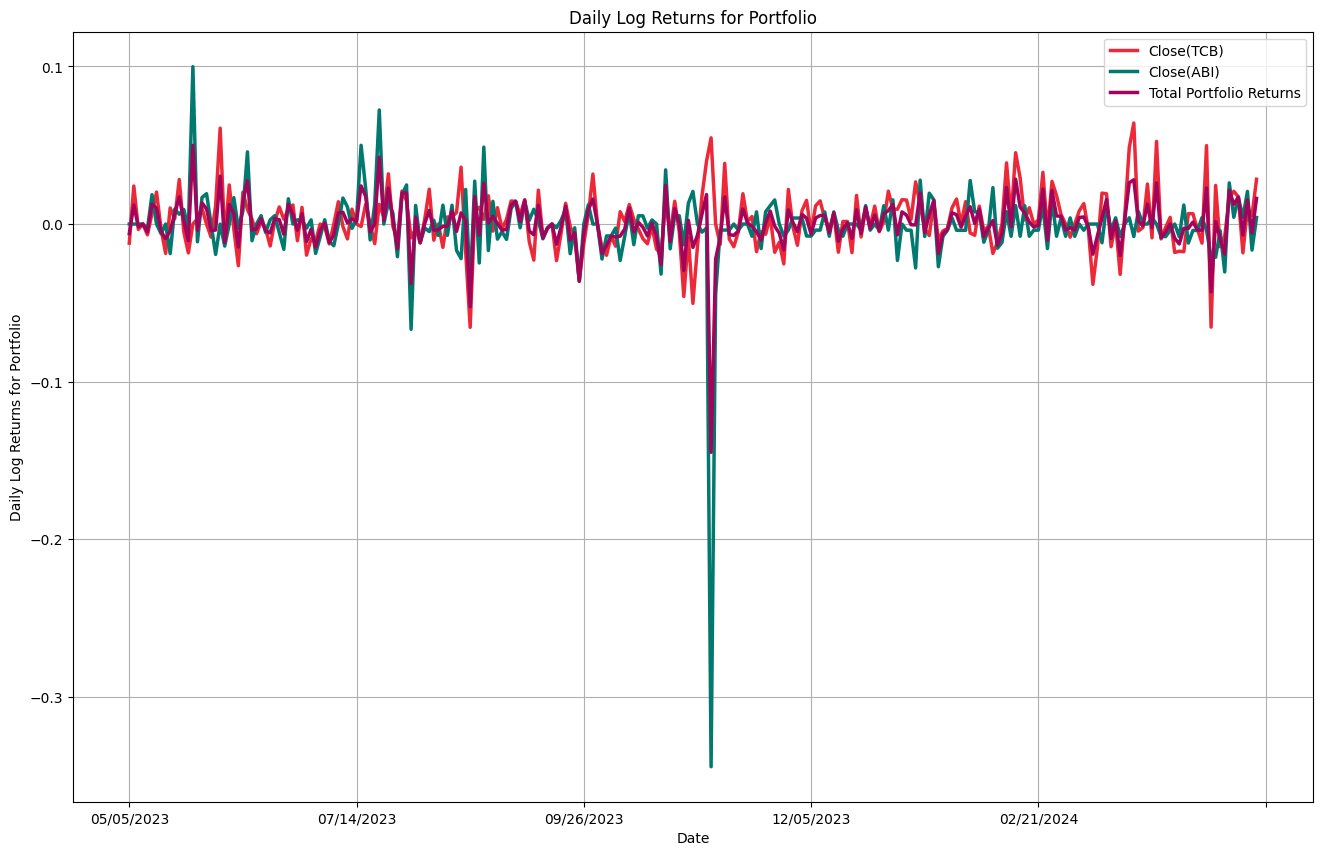

In [15]:
color=['#ed2939','#01796f','#a1045a']
total_returns_percentage.plot(color = color, figsize=(16,10), linewidth=2.5)
plt.title('Daily Log Returns for Portfolio')
plt.ylabel('Daily Log Returns for Portfolio')
plt.grid()
plt.show()

In [16]:
row_multiplier = portfolio_value + [total_portfolio_value]
row_multiplier_df = pd.DataFrame([row_multiplier], columns=total_returns_percentage.columns)
row_multiplier_df

,Close(TCB),Close(ABI),Total Portfolio Returns
0,5000.0,5000.0,10000


In [17]:
# Calculate Values 
total_returns_value = total_returns_percentage.copy()
total_returns_value = total_returns_percentage.mul(row_multiplier_df.values[0], axis=1)
total_returns_value

,Close(TCB),Close(ABI),Total Portfolio Returns
Date,,,
05/05/2023,-60.60,0.00,-60.6
05/08/2023,120.50,0.00,120.5
05/09/2023,-17.05,0.00,-17.0
05/10/2023,0.00,0.00,0.0
05/11/2023,-34.25,-15.65,-49.9
...,...,...,...
04/24/2024,85.85,84.75,170.6
04/25/2024,-91.25,20.95,-70.3
04/26/2024,48.50,103.50,152.0


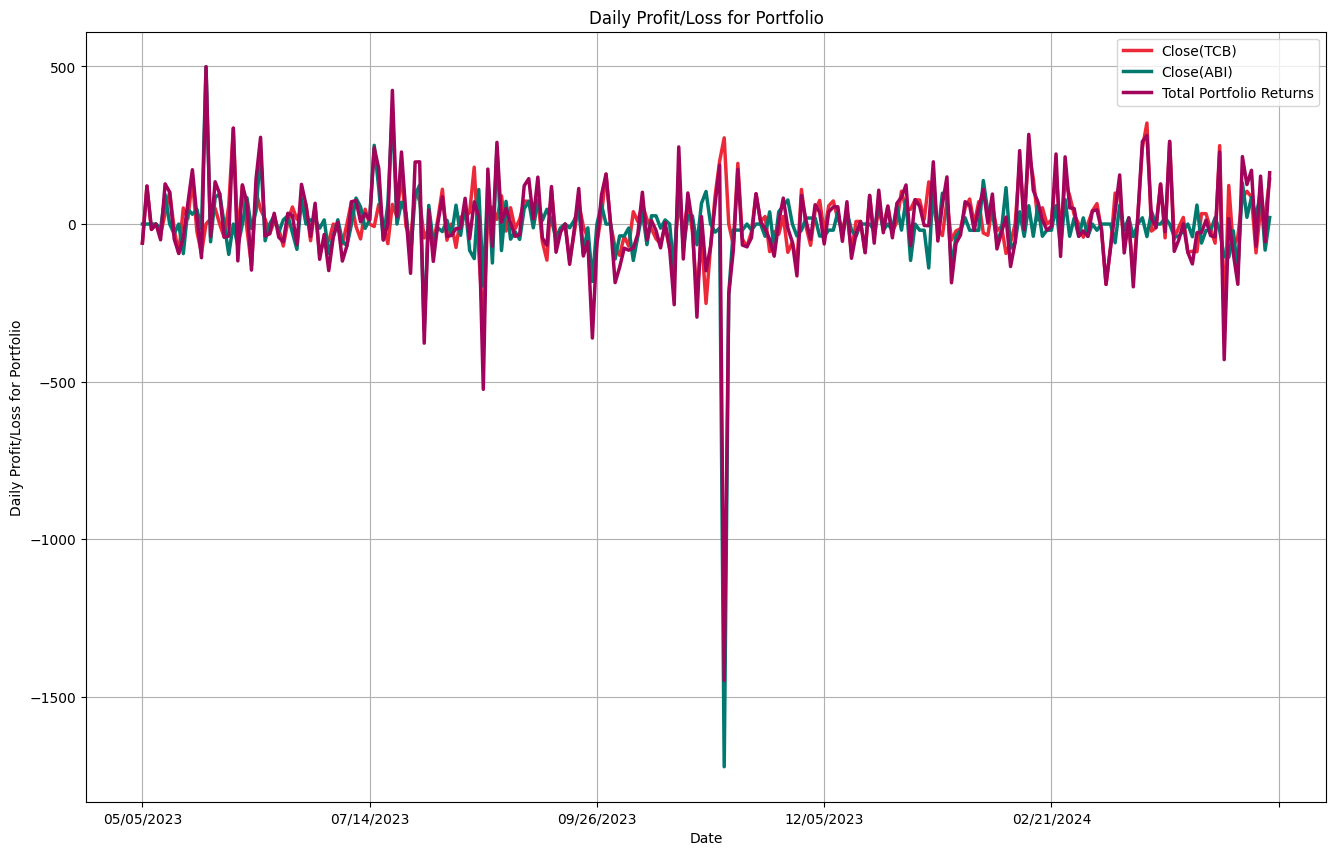

In [18]:
color=['#ed2939','#01796f','#a1045a']
total_returns_value.plot(color = color, figsize=(16,10), linewidth=2.5)
plt.title('Daily Profit/Loss for Portfolio')
plt.ylabel('Daily Profit/Loss for Portfolio')
plt.grid()
plt.show()

# Find the X-day portfolio returns

In [19]:
days = 1

historical_x_days_returns = historical_returns.rolling(window = days).sum()
historical_x_days_returns = historical_x_days_returns.dropna()
print(historical_x_days_returns)

Date
05/05/2023   -0.00606
05/08/2023    0.01205
05/09/2023   -0.00170
05/10/2023    0.00000
05/11/2023   -0.00499
               ...   
04/24/2024    0.01706
04/25/2024   -0.00703
04/26/2024    0.01520
05/02/2024   -0.00559
05/03/2024    0.01628
Length: 249, dtype: float64


# Create a covariance matrix 

In [20]:
cov_matrix = log_returns.cov() * 250

# Calculate portfolio standard deviation

In [21]:
weights_array = np.array(weights)
portfolio_std_dev = np.sqrt(weights_array.T @ cov_matrix @ weights_array)

# Set different confidence intervals

In [22]:
confidence_intervals = [0.9, 0.95, 0.99]

# Select CI and calculate VaR

In [23]:
from scipy.stats import norm
VaRs = []
for ci in confidence_intervals: 
    
    VaR = total_portfolio_value * (norm.ppf(1 - ci) * portfolio_std_dev * np.sqrt(days / 250) - historical_returns.mean() * days)

    VaRs.append(VaR)

In [24]:
print(f'{"Confidence Interval":<20} {"Value at Risk: <20"}')
print('-' * 40)
#print each confidence interval and its corresponding VaR
for ci, VaR in zip(confidence_intervals, VaRs):
    print(f'{ci * 100:>6.0f}%: {"":<8}    {VaR:>10,.2f}')

Confidence Interval  Value at Risk: <20
----------------------------------------
    90%:                -204.86
    95%:                -261.67
    99%:                -368.23


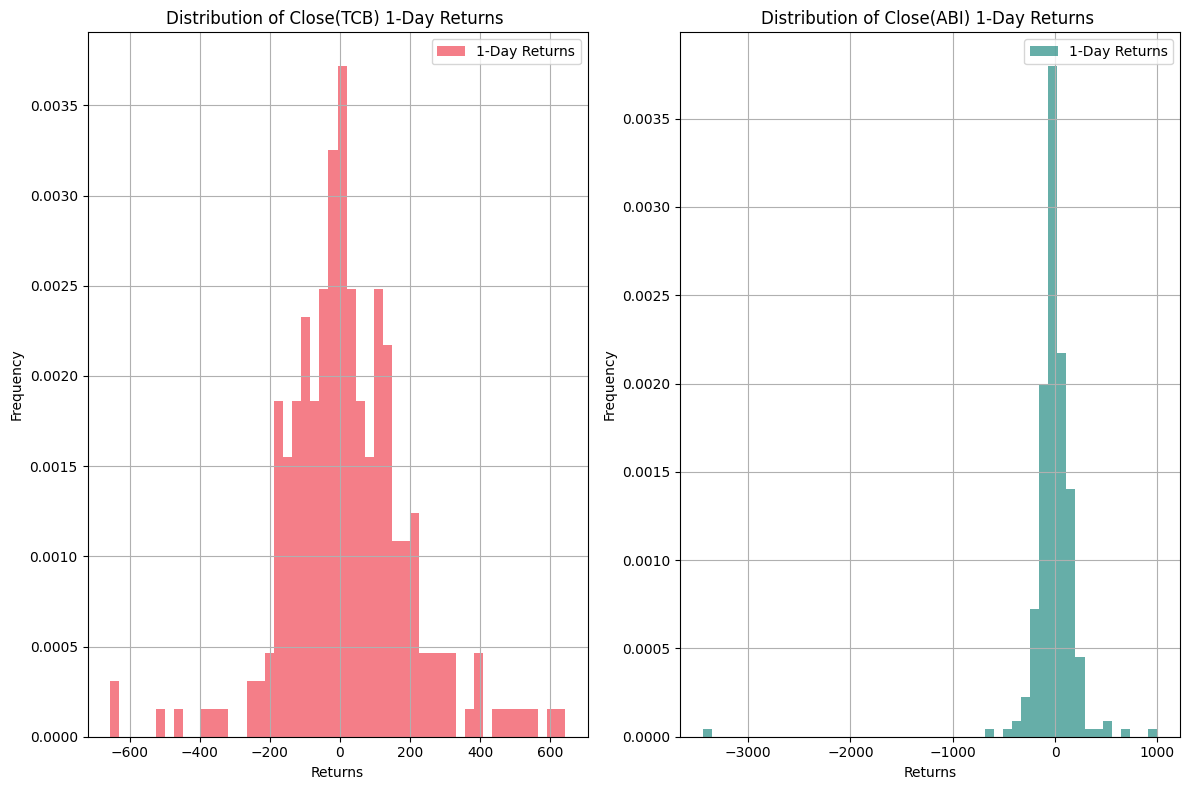

In [25]:
return_window = days
historical_x_days_returns_individual = log_returns.rolling(window=return_window).sum()  
historical_x_days_returns_individual = historical_x_days_returns_individual.dropna()

historical_x_days_returns_values_individual = historical_x_days_returns_individual * total_portfolio_value

# Define the colors for the histograms
colors = ['#ed2939', '#01796f']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Iterate over the columns and plot histograms in each subplot
for i, (col, color) in enumerate(zip(historical_x_days_returns_values_individual.columns, colors)):
    axs[i].hist(historical_x_days_returns_values_individual[col].dropna(), bins=50, density=True, alpha=0.6, label=f'{days}-Day Returns', color=color)
    axs[i].set_xlabel('Returns')  
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Distribution of {col} {days}-Day Returns ')
    axs[i].grid()
    axs[i].legend()

plt.tight_layout()
plt.show()


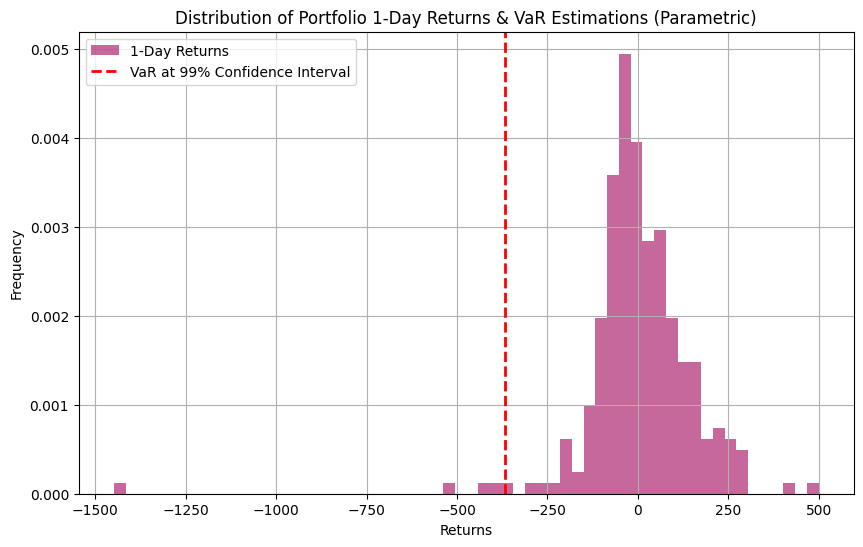

In [26]:
historical_x_days_returns_values = historical_x_days_returns * total_portfolio_value

plt.figure(figsize=(10, 6))  # Adjust the figsize here
plt.hist(historical_x_days_returns_values.dropna(), bins=60, density=True, alpha=0.6, label=f'{days}-Day Returns', color='#a1045a')
plt.xlabel('Returns')  
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns & VaR Estimations (Parametric)')
plt.axvline(x=VaRs[confidence_intervals.index(0.99)], color='r', linestyle='dashed', linewidth=2, label='VaR at 99% Confidence Interval')
plt.grid()
plt.legend()
plt.show()


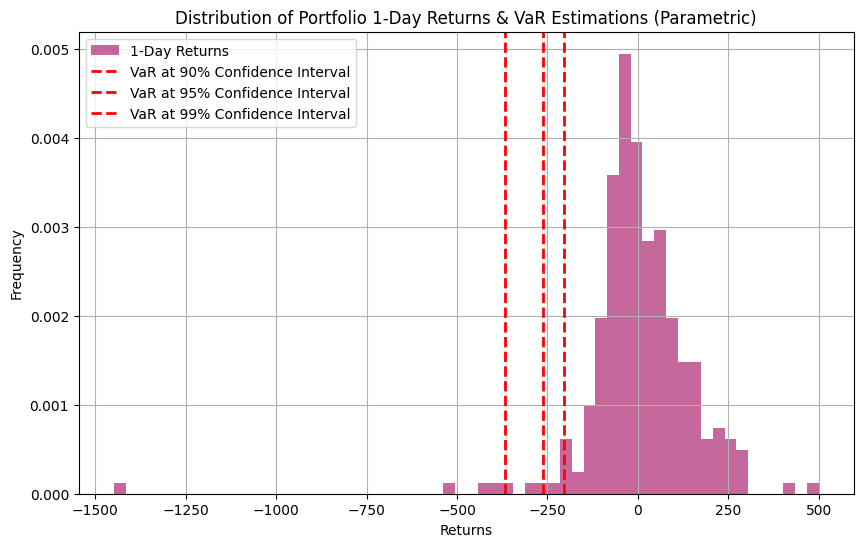

In [27]:
plt.figure(figsize=(10, 6))  # Adjust the figsize here
plt.hist(historical_x_days_returns_values.dropna(), bins=60, density=True, alpha=0.6, label=f'{days}-Day Returns', color='#a1045a')

for ci, VaR in zip(confidence_intervals,VaRs):
    plt.axvline(x= VaR, color='r', linestyle='dashed', linewidth=2, label='VaR at {}% Confidence Interval'.format(int(ci *100)))


plt.xlabel('Returns')  
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns & VaR Estimations (Parametric)')
plt.grid()
plt.legend()
plt.show()


In [28]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

plt.ioff()


class Backtest:
    def __init__(self, actual, forecast, alpha):
        self.index = actual.index
        self.actual = actual.values
        self.forecast = forecast.values
        self.alpha = alpha

    def hit_series(self):
        return (self.actual < self.forecast) * 1

    def number_of_hits(self):
        return self.hit_series().sum()

    def hit_rate(self):
        return self.hit_series().mean()

    def expected_hits(self):
        return self.actual.size * self.alpha

    def duration_series(self):
        hit_series = self.hit_series()
        hit_series[0] = 1
        hit_series[-1] = 1
        return np.diff(np.where(hit_series == 1))[0]

    def plot(self, file_name=None):

        # Re-add the time series index
        r = pd.Series(self.actual, index=self.index)
        q = pd.Series(self.forecast, index=self.index)

        sns.set_context("paper")
        sns.set_style("whitegrid", {"font.family": "serif", "font.serif": "Computer Modern Roman", "text.usetex": True})

        # Hits
        ax = r[r <= q].plot(color="red", marker="o", ls="None", figsize=(6, 3.5))
        for h in r[r <= q].index:
            plt.axvline(h, color="black", alpha=0.4, linewidth=1, zorder=0)

        # Positive returns
        r[q < r].plot(ax=ax, color="green", marker="o", ls="None")

        # Negative returns but no hit
        r[(q <= r) & (r <= 0)].plot(ax=ax, color="orange", marker="o", ls="None")

        # VaR
        q.plot(ax=ax, grid=False, color="black", rot=0)

        # Axes
        plt.xlabel("")
        plt.ylabel("Log Return")
        ax.yaxis.grid()

        sns.despine()
        if file_name is None:
            plt.show()
        else:
            plt.savefig(file_name, bbox_inches="tight")
        plt.close("all")

    def tick_loss(self, return_mean=True):
        loss = (self.alpha - self.hit_series()) * (self.actual - self.forecast)
        if return_mean:
            return loss.mean()
        else:
            return loss

    def smooth_loss(self, delta=25, return_mean=True):
        """Gonzalez-Rivera, Lee and Mishra (2004)"""
        loss = ((self.alpha - (1 + np.exp(delta*(self.actual - self.forecast)))**-1) * (self.actual - self.forecast))
        if return_mean:
            return loss.mean()
        else:
            return loss

    def quadratic_loss(self, return_mean=True):
        """Lopez (1999); Martens et al. (2009)"""
        loss = (self.hit_series() * (1 + (self.actual - self.forecast)**2))
        if return_mean:
            return loss.mean()
        else:
            return loss

    def firm_loss(self, c=1, return_mean=True):
        """Sarma et al. (2003)"""
        loss = (self.hit_series() * (1 + (self.actual - self.forecast)**2) - c*(1-self.hit_series()) * self.forecast)
        if return_mean:
            return loss.mean()
        else:
            return loss

    def lr_bt(self):
        """Likelihood ratio framework of Christoffersen (1998)"""
        hits = self.hit_series()   # Hit series
        tr = hits[1:] - hits[:-1]  # Sequence to find transitions

        # Transitions: nij denotes state i is followed by state j nij times
        n01, n10 = (tr == 1).sum(), (tr == -1).sum()
        n11, n00 = (hits[1:][tr == 0] == 1).sum(), (hits[1:][tr == 0] == 0).sum()

        # Times in the states
        n0, n1 = n01 + n00, n10 + n11
        n = n0 + n1

        # Probabilities of the transitions from one state to another
        p01, p11 = n01 / (n00 + n01), n11 / (n11 + n10)
        p = n1 / n

        if n1 > 0:
            # Unconditional Coverage
            uc_h0 = n0 * np.log(1 - self.alpha) + n1 * np.log(self.alpha)
            uc_h1 = n0 * np.log(1 - p) + n1 * np.log(p)
            uc = -2 * (uc_h0 - uc_h1)

            # Independence
            ind_h0 = (n00 + n01) * np.log(1 - p) + (n01 + n11) * np.log(p)
            ind_h1 = n00 * np.log(1 - p01) + n01 * np.log(p01) + n10 * np.log(1 - p11)
            if p11 > 0:
                ind_h1 += n11 * np.log(p11)
            ind = -2 * (ind_h0 - ind_h1)

            # Conditional coverage
            cc = uc + ind

            # Stack results
            df = pd.concat([pd.Series([uc, ind, cc]),
                            pd.Series([1 - stats.chi2.cdf(uc, 1),
                                    1 - stats.chi2.cdf(ind, 1),
                                    1 - stats.chi2.cdf(cc, 2)])], axis=1)
        else:
            df = pd.DataFrame(np.zeros((3, 2))).replace(0, np.nan)

        # Assign names
        df.columns = ["Statistic", "p-value"]
        df.index = ["Unconditional", "Independence", "Conditional"]

        return df

    def dq_bt(self, hit_lags=4, forecast_lags=1):
        """Dynamic Quantile Test (Engle & Manganelli, 2004)"""
        try:
            hits = self.hit_series()
            p, q, n = hit_lags, forecast_lags, hits.size
            pq = max(p, q - 1)
            y = hits[pq:] - self.alpha  # Dependent variable
            x = np.zeros((n - pq, 1 + p + q))
            x[:, 0] = 1  # Constant

            for i in range(p):  # Lagged hits
                x[:, 1 + i] = hits[pq-(i+1):-(i+1)]

            for j in range(q):  # Actual + lagged VaR forecast
                if j > 0:
                    x[:, 1 + p + j] = self.forecast[pq-j:-j]
                else:
                    x[:, 1 + p + j] = self.forecast[pq:]

            beta = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
            lr_dq = np.dot(beta, np.dot(np.dot(x.T, x), beta)) / (self.alpha * (1-self.alpha))
            p_dq = 1 - stats.chi2.cdf(lr_dq, 1+p+q)

        except:
            lr_dq, p_dq = np.nan, np.nan

        return pd.Series([lr_dq, p_dq],
                    index=["Statistic", "p-value"], name="DQ")


if __name__ == "__main__":

    # Test data: the daily log returns of the IBM stock and the 1% VaR forecasts stemming from a variety of risk models.
    total_returns_value['forecast'] = - 368.23
    Y = total_returns_value['Total Portfolio Returns']
    X = total_returns_value.drop(['Total Portfolio Returns'], axis=1)
    bt = Backtest(actual=Y, forecast=X.loc[:, "forecast"], alpha=0.01)


In [29]:
bt.hit_series()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [30]:
bt.number_of_hits()

4

In [31]:
bt.hit_rate()

0.01606425702811245

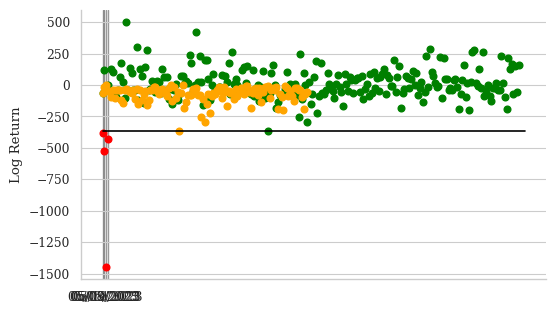

In [32]:
bt.plot()


In [33]:
bt.dq_bt(
    
)

Statistic    1.081295
p-value      0.982342
Name: DQ, dtype: float64

In [34]:
bt.lr_bt()

,Statistic,p-value
Unconditional,0.793716,0.372979
Independence,0.131153,0.717239
Conditional,0.924870,0.629748
